<a href="https://colab.research.google.com/github/harsha0062/ml_learning/blob/main/Zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml -working/colab/Outliers Detection and removal techniques/Zscore/placement1.csv')

In [54]:
df.shape

(1000, 3)

In [55]:
df.sample(5)

,cgpa,placement_exam_marks,placed
800,6.50,28.0,0
789,6.46,74.0,0
880,6.40,13.0,0
477,5.78,18.0,0
424,6.91,30.0,0


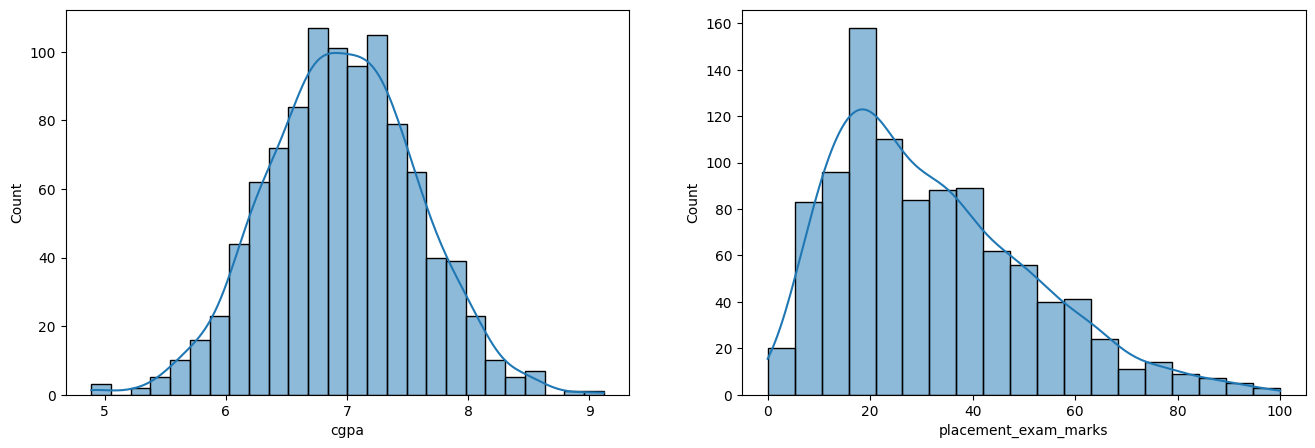

In [56]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [57]:
a=df['placement_exam_marks'].skew()
b=float(a)
b

0.8356419499466834

In [58]:
print("mean value of cgpa",df['cgpa'].mean())
print("median value of cgpa",df['cgpa'].median())
print("min value of cgpa ",df['cgpa'].min())
print("max value of cgpa ",df['cgpa'].max())

mean value of cgpa 6.96124
median value of cgpa 6.96
min value of cgpa  4.89
max value of cgpa  9.12


In [59]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [60]:
# finding outliers
df[(df['cgpa']>8.80)|(df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


**Trimming**

In [61]:
# Trimming
new_df=df[(df['cgpa']<8.80)&(df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [62]:
# approch 2
# calculating the zscore

df['cgpa_zscore']= (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [63]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [64]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [65]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [66]:
df[(df['cgpa_zscore']>3)|(df['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [67]:
new_df=df[(df['cgpa_zscore']<3)&(df['cgpa_zscore']>-3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


**Capping**

In [68]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()
print(upper_limit)
print(lower_limit)

8.808933625397168
5.113546374602832


In [69]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [70]:
df.shape

(1000, 4)

In [71]:
df['cgpa' ].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934
